<a href="https://colab.research.google.com/github/Mayuri-thatikonda/insurance_amount/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset = pd.read_csv('insurance.csv')

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['region'] = le.fit_transform(dataset['region'])
print(dataset)

      age     sex   bmi  children smoker  region  expenses
0      19  female  27.9         0    yes       3  16884.92
1      18    male  33.8         1     no       2   1725.55
2      28    male  33.0         3     no       2   4449.46
3      33    male  22.7         0     no       1  21984.47
4      32    male  28.9         0     no       1   3866.86
...   ...     ...   ...       ...    ...     ...       ...
1333   50    male  31.0         3     no       1  10600.55
1334   18  female  31.9         0     no       0   2205.98
1335   18  female  36.9         0     no       2   1629.83
1336   21  female  25.8         0     no       3   2007.95
1337   61  female  29.1         0    yes       1  29141.36

[1338 rows x 7 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset[['sex', 'smoker']]= dataset[['sex', 'smoker']].apply(le.fit_transform)
print(dataset)


      age  sex   bmi  children  smoker  region  expenses
0      19    0  27.9         0       1       3  16884.92
1      18    1  33.8         1       0       2   1725.55
2      28    1  33.0         3       0       2   4449.46
3      33    1  22.7         0       0       1  21984.47
4      32    1  28.9         0       0       1   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1333   50    1  31.0         3       0       1  10600.55
1334   18    0  31.9         0       0       0   2205.98
1335   18    0  36.9         0       0       2   1629.83
1336   21    0  25.8         0       0       3   2007.95
1337   61    0  29.1         0       1       1  29141.36

[1338 rows x 7 columns]


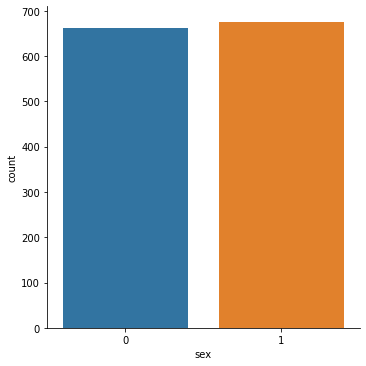

In [ ]:
import seaborn as sns
sns.catplot(x='sex', data=dataset, kind='count');


In [ ]:
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95
1337,61,0,29.1,0,1,1,29141.36


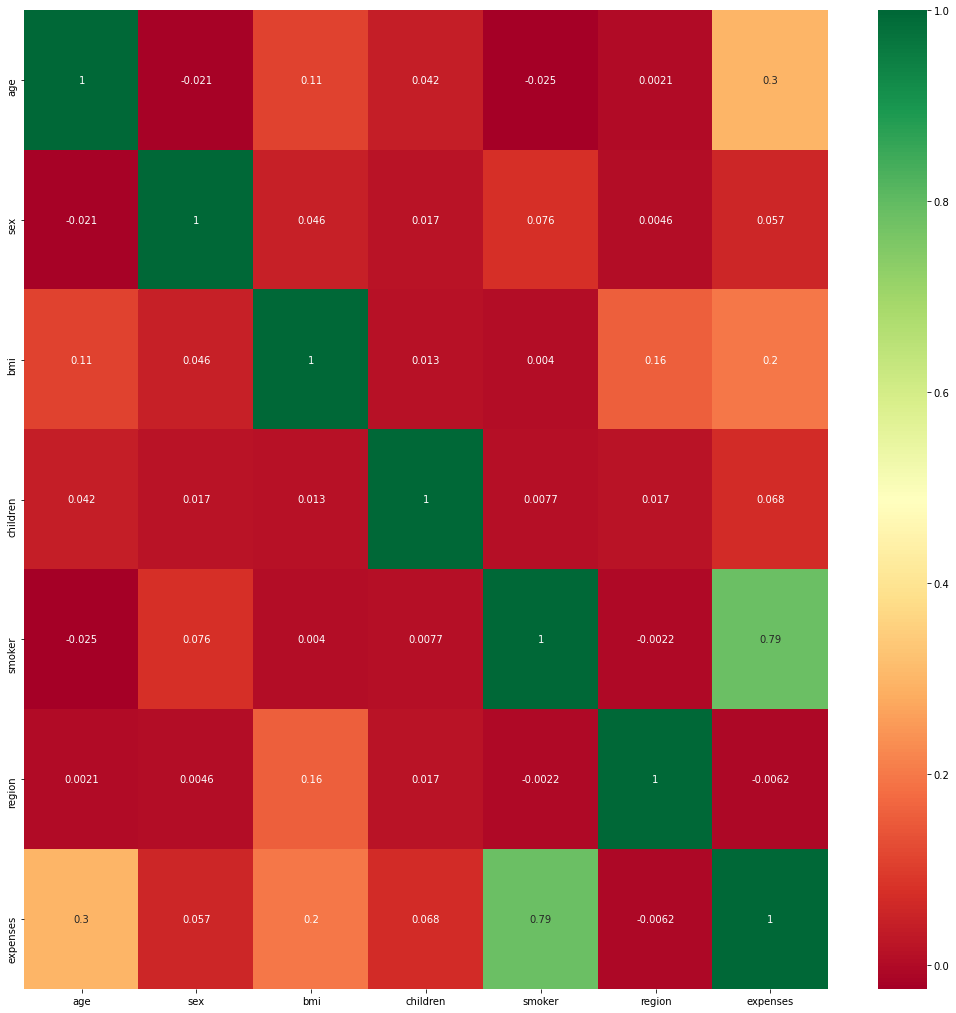

In [ ]:
import seaborn as sns
plt.figure(figsize=(18,18))
hm=sns.heatmap(dataset.corr(),annot=True,cmap="RdYlGn")
plt.show()


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
       X, y,test_size = 0.2, random_state=0)

In [ ]:
y = y.reshape(len(y),1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


[[10821.8   9724.53]
 [ 9699.21  8547.69]
 [48907.52 45702.02]
 [13884.25 12950.07]
 [11202.24  9644.25]
 [ 5312.14  4500.34]
 [ 3404.39  2198.19]
 [12578.2  11436.74]
 [ 8384.22  7537.16]
 [ 5629.98  5425.02]
 [ 8265.55  6753.04]
 [11385.73 10493.95]
 [ 8477.89  7337.75]
 [ 5221.07  4185.1 ]
 [20756.81 18310.74]
 [11768.98 10702.64]
 [13626.15 12523.6 ]
 [ 4805.39  3490.55]
 [ 7542.85  6457.84]
 [25010.21 33475.82]
 [24146.12 23967.38]
 [13855.07 12643.38]
 [11344.45 23045.57]
 [27149.29 23065.42]
 [ 2803.96  1674.63]
 [ 5929.16  4667.61]
 [ 5242.84  3732.63]
 [ 8594.35  7682.67]
 [ 4817.39  3756.62]
 [ 9558.98  8413.46]
 [ 8828.09  8059.68]
 [49036.04 48970.25]
 [13972.82 12979.36]
 [11408.84 20630.28]
 [14029.7  14571.89]
 [ 5237.67  4137.52]
 [ 9345.09  8347.16]
 [38949.95 51194.56]
 [39899.98 40003.33]
 [ 3026.83  1880.49]
 [ 6824.57  5458.05]
 [ 3939.81  2867.12]
 [22577.75 20149.32]
 [49680.88 47496.49]
 [38310.14 36149.48]
 [ 4805.27 26018.95]
 [11747.02 19749.38]
 [ 8117.6   6

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8897106497731322